# Classification report generator

All in one classification tester generates reports 

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [14]:
# Functions and constants
# Put models in a dictonary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def generate_report(X_train, X_test, y_train, y_test):
    """
    renerates report with default RandomForestClassifier paramaters
    """
    np.random.seed(42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print(f"Model score: {model.score(X_test, y_test)}")
    plot_roc_curve(model, X_test, y_test)
    plot_conf_mat(y_test, y_preds)
    print(classification_report(y_test, y_preds))
    
    print("===========CROSS VALIDATED METRICS===========")
    print(f"accuracy: {cross_validated_metric(model, 'accuracy')}")
    print(f"precision: {cross_validated_metric(model, 'precision')}")
    print(f"recall: {cross_validated_metric(model, 'recall')}")
    print(f"f1: {cross_validated_metric(model, 'f1')}")
          
    
    print("===========FEATURE IMPORTANCE===========")
    feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
    feature_df = pd.DataFrame(feature_dict, index=[0])
    feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(10, 6));
    
    

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale = 1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
def cross_validated_metric(model, metric:str)->float:
    """
    returns the cross-validated (5) metric for any valid metric
    Common accepted ones: 
     - 'accuracy'
     - 'precision'
     - 'recall'
     - 'f1'
     """
    cv_metric = cross_val_score(model, X, y, cv=5, scoring=metric)
    return np.mean(cv_metric)

## Import file

In [19]:
df = pd.read_csv("data/BTCUSDT-hour-target-classification.csv")
df = df[0:29000] #To not forward test
df = df.dropna()
len(df)

29000

In [22]:
# Split data into X and y
X = df.drop(["timestamp", "target_new", "target", "open", "high", "low", "close", "ln_close", "close_time"], axis=1)
# X = df[["volume_adi", "volume_obv", "volume_nvi", "volatility_atr", "volatility_bbh", "others_cr"]].copy()
y = df["target_new"]

# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Model score: 0.9786206896551725
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3842
           1       0.97      0.96      0.97      1958

    accuracy                           0.98      5800
   macro avg       0.98      0.97      0.98      5800
weighted avg       0.98      0.98      0.98      5800

===========CROSS VALIDATED METRICS===========
accuracy: 0.5161724137931034
precision: 0.3396100811176096
recall: 0.44720506702592894
f1: 0.285953973464911
===========FEATURE IMPORTANCE===========


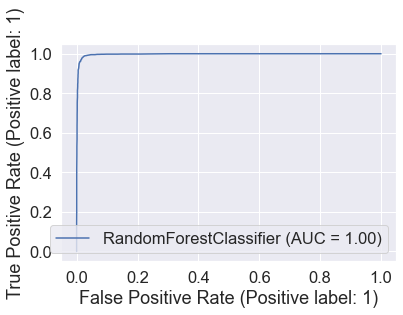

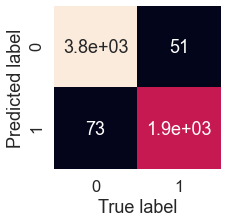

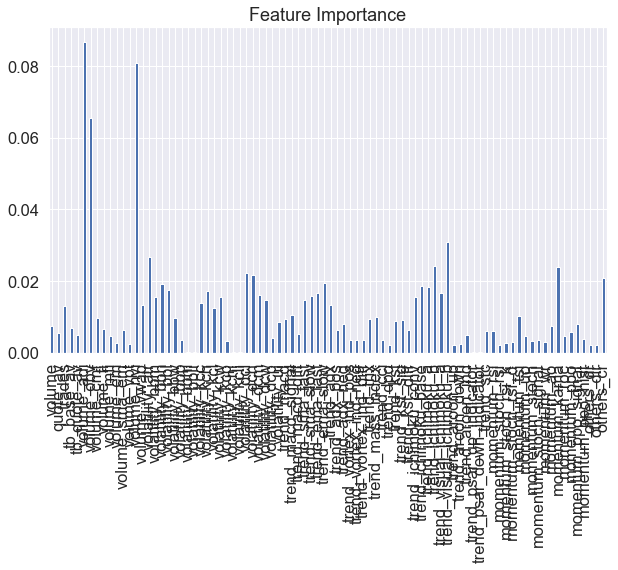

In [23]:
generate_report(X_train, X_test, y_train, y_test)